# PyTorch Workflow

1. Data (prepare and load)
2. Build Model
3. Fitting the model to data (training)
4. Making predictions and evaluating the model
5. Saving and loading a model
6. Putting it all together

In [230]:
import torch
from torch import nn # contains building block for computational graphs
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

## 1. Preparing and loading data

Data can be almost anything in Machine Learning

ML is game of 2 parts:
1. Get data into a numerical representation
2. Build a model to learn patters in that numerical data

In [231]:
# Initial parameters
weight = 0.7
bias = 0.3

# Create other const values
start = 0
end = 1
step = 0.02

# Let create some *know* data for linear regression model
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [232]:
 len(X), len(y)

(50, 50)

In [233]:
# Splitting data to train, cross-validation and test set

In [234]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [235]:
# Let's visualize the data, it helps with understanding the data

In [236]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plotr training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, s=8, label="Training data", c="b")
  plt.scatter(test_data, test_labels, s=8, label="Test data", c="r")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

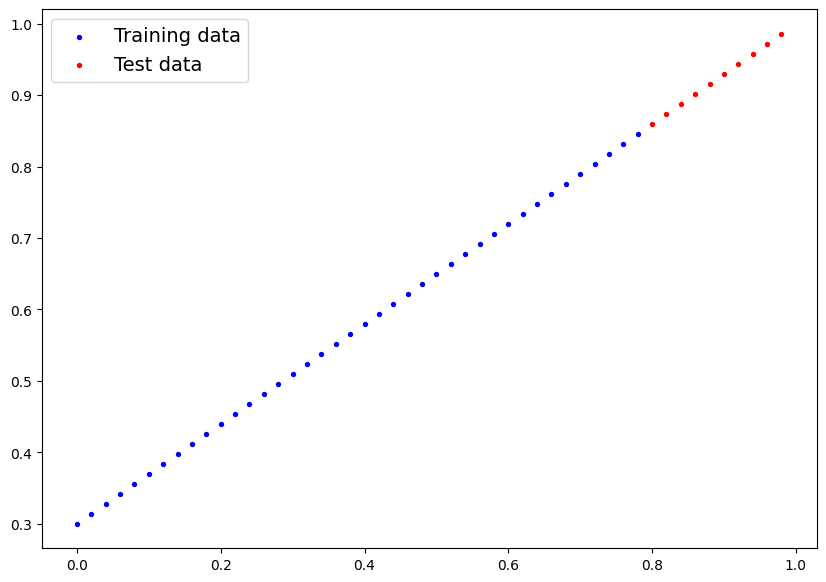

In [237]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build first model

In [238]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from the Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression


In [239]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the parameters
list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [240]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [241]:
# Making predictions using torch.inference_mode(), preferred method
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

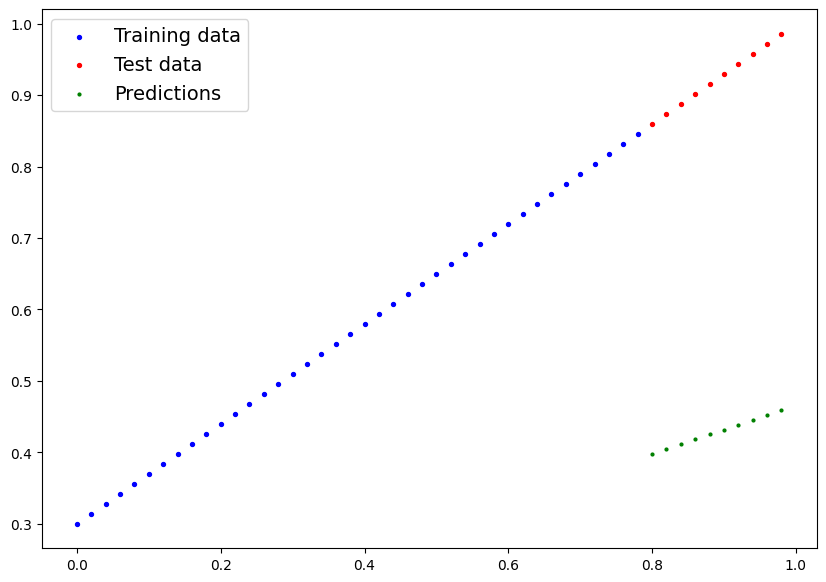

In [242]:
plot_predictions(predictions=y_preds)

### 3. Train model

In [243]:
# Define loss function
criterion = nn.MSELoss()

# Define optimizer
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

In [244]:
# Build a training loop and testing loop
epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
for epoch in range(epochs):
  # Forward pass
  y_pred = model_0(X_train)

  # Calculate loss
  loss = criterion(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backprop on the loss with respect to the parameters of the model
  loss.backward()

  # Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # turns off gradient tracking

  with torch.inference_mode():
    # Forward pass
    test_pred = model_0(X_test)

    # Calculate the loss
    test_loss = criterion(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f} , Test loss: {test_loss}")
      print(model_0.state_dict())



Epoch [1/200], Loss: 0.1049 , Test loss: 0.2266416996717453
OrderedDict([('weights', tensor([0.3467])), ('bias', tensor([0.1388]))])
Epoch [11/200], Loss: 0.0350 , Test loss: 0.08532668650150299
OrderedDict([('weights', tensor([0.4441])), ('bias', tensor([0.2360]))])
Epoch [21/200], Loss: 0.0053 , Test loss: 0.018773499876260757
OrderedDict([('weights', tensor([0.5270])), ('bias', tensor([0.3173]))])
Epoch [31/200], Loss: 0.0010 , Test loss: 0.0016791874077171087
OrderedDict([('weights', tensor([0.5807])), ('bias', tensor([0.3658]))])
Epoch [41/200], Loss: 0.0020 , Test loss: 0.000175416047568433
OrderedDict([('weights', tensor([0.6008])), ('bias', tensor([0.3763]))])
Epoch [51/200], Loss: 0.0012 , Test loss: 0.0007114512263797224
OrderedDict([('weights', tensor([0.5998])), ('bias', tensor([0.3632]))])
Epoch [61/200], Loss: 0.0006 , Test loss: 0.0022178818471729755
OrderedDict([('weights', tensor([0.5956])), ('bias', tensor([0.3462]))])
Epoch [71/200], Loss: 0.0006 , Test loss: 0.00290

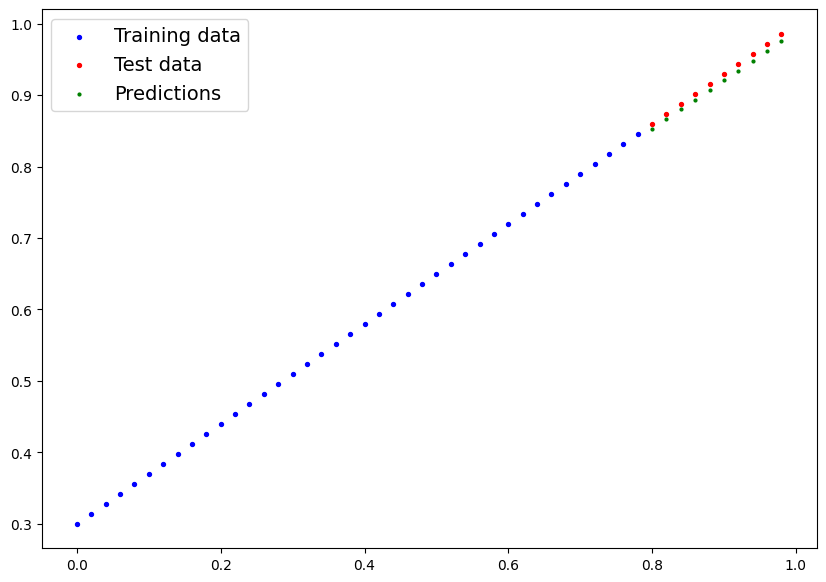

In [245]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [246]:
train_loss_values = torch.tensor(train_loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

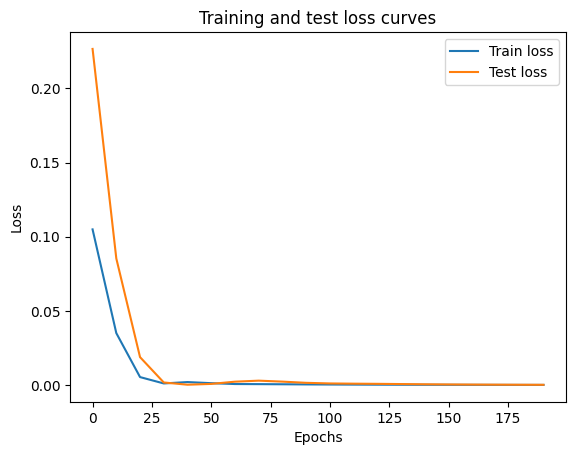

In [247]:
# Plot loss curves

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Saving and loading a model in PyTorch

3 methods to save and load a model:
1. `torch.save()` - allows you to save y PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary (model's parameters)

In [248]:
# Saving PyTorch model

from pathlib import Path

# Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create a model save path
MODEL_NAME = "Pytorch_workflow_example.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/Pytorch_workflow_example.pth')

In [249]:
# Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(),
           MODEL_SAVE_PATH)

Saving model to: models/Pytorch_workflow_example.pth


In [250]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1662 Jul 13 20:21 Pytorch_workflow_example.pth


In [253]:
# Loading a model
# We need create a new instance of the model and load the state_dict()
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([2.2082])), ('bias', tensor([-0.6380]))])

In [254]:
# Load the model states and check them
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6807])), ('bias', tensor([0.3082]))])